# Activation Functions - dimensions

In [1]:
import torch.nn

m = torch.nn.Softmax(dim=1)
img = torch.randn(1, 2, 3)
model_output = m(img)

print(img)
print(model_output)

tensor([[[ 0.1900,  0.8290, -0.3285],
         [ 0.8916, -0.5556, -0.8311]]])
tensor([[[0.3315, 0.7997, 0.6231],
         [0.6685, 0.2003, 0.3769]]])


# MSE

In [187]:
criterion = torch.nn.MSELoss()

# x and y coordinate of center of max area element pred and center of oval around max area element pred

good = criterion(torch.tensor([0.5, 0.1]), torch.tensor([0.3, 0.1]))
mid = criterion(torch.tensor([0.5, 0.1]), torch.tensor([0.10, 0.1]))
bad = criterion(torch.tensor([0.8, 0.9]), torch.tensor([0.3, 0.1]))

print(good, mid, bad)

tensor(0.0200) tensor(0.0800) tensor(0.4450)


# Rampup function visualisation

0.010132432219606831


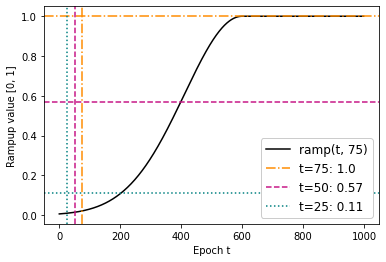

In [2]:
import numpy as np
import matplotlib.pyplot as plt

currents = range(0, 1000)
rampup_length = 600

results = []
for current in currents:
    current = np.clip(current, 0.0, rampup_length)
    result = float(np.exp(-5.0 * (1.0 - current / rampup_length) ** 2))
    results.append(result)

print(results[25])
    
plt.figure()
plt.plot(currents, results, color = 'k', label = "ramp(t, 75)")
plt.xlabel("Epoch t")
plt.ylabel("Rampup value [0, 1]")
plt.axvline(x = 75, color = 'darkorange', label = 't=75: 1.0', linestyle = '-.')
plt.axhline(y = 1, color = 'darkorange', linestyle = '-.')
plt.axvline(x = 50, color = 'mediumvioletred', label = 't=50: 0.57', linestyle = '--')
plt.axhline(y = 0.57, color = 'mediumvioletred', linestyle = '--')
plt.axvline(x = 25, color = 'teal', label = 't=25: 0.11', linestyle = ':')
plt.axhline(y = 0.11, color = 'teal', linestyle = ':')
plt.legend(loc = 'lower right', facecolor="white", framealpha=1, fontsize="large")
plt.tight_layout()
plt.savefig("example_results/rampup.png", dpi=1200)


# dict from keys

In [3]:
b_keys = [  'loss',
            'acc', 'fscore', 'fmicro', 'jac', 'prec', 'rec',
            'symhd' # task specific: segmentation
        ]

# everything we want to track
batch_collector = { key : [] for key in b_keys }

print(batch_collector)

for i in range(5):
    batch_collector["loss"].append(4)
    # batch_collector["acc"] = 1.0

print(batch_collector)

{'loss': [], 'acc': [], 'fscore': [], 'fmicro': [], 'jac': [], 'prec': [], 'rec': [], 'symhd': []}
{'loss': [4, 4, 4, 4, 4], 'acc': [], 'fscore': [], 'fmicro': [], 'jac': [], 'prec': [], 'rec': [], 'symhd': []}


In [4]:
Details = {"Destination": "China", 
           "Nationality": "Italian", "Age": []}

for i in range(5):
    Details["Age"].append(2) # [20, "Twenty"]
    
print(Details)

{'Destination': 'China', 'Nationality': 'Italian', 'Age': [2, 2, 2, 2, 2]}


In [5]:
for key in batch_collector.keys():
    print(key, np.mean(batch_collector[key]))
    

loss 4.0
acc nan
fscore nan
fmicro nan
jac nan
prec nan
rec nan
symhd nan


C:\Users\Prinzessin\anaconda3\envs\feta\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Prinzessin\anaconda3\envs\feta\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [6]:
# set of vowels
keys = {'a', 'e', 'i', 'o', 'u' }

# assign empty list to value
value = []

# creates a dictionary with keys and values
vowels = { key : [] for key in keys }

vowels["a"].append("hi")

print(vowels)

{'u': [], 'a': ['hi'], 'o': [], 'i': [], 'e': []}


# Grid Search

In [7]:
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

# doing contour stuff here - to draw an area, it needs to be in a list

In [ ]:
import numpy as np
import cv2
img = cv2.imread('E:/Christina/Result_Data/ADAM_AMD/fundus_mask_bin/A0010.bmp', cv2.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
ret,thresh = cv2.threshold(img,127,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)
cnt = contours[0]
M = cv.moments(cnt)
print( M )

area = cv2.contourArea(cnt)
print(area)

num_labels, labels_im = cv2.findContours(thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)    
if len(num_labels) > 0:
    max_area = max(num_labels, key = cv2.contourArea)
    max_area = cv2.contourArea(max_area)
    print(max_area)

# segmentation model

In [59]:
import segmentation_models_pytorch as smp
import torchvision.datasets
import torchvision.transforms
device = "cpu"

s_model = smp.UnetPlusPlus(
                        encoder_name="efficientnet-b0",        # choose encoder, e.g. mobilenet_v2 or efficientnet-b7
                        encoder_weights="imagenet",
                        in_channels=3,          # model input channels (1 for gray-scale images, 3 for RGB, etc.)
                        classes=2,         # model output channels (number of classes in your dataset)
                        aux_params =dict(
                            pooling='avg',             # one of 'avg', 'max'
                            dropout=0.5,               # dropout ratio, default is None
                            activation='sigmoid',      # activation function, default is None
                            classes=4,                 # define number of output labels
                        )
                    )


# print(s_model.encoder)

ichallenge_data = torchvision.datasets.ImageFolder('example_data')
img, label = ichallenge_data.__getitem__(1)

resize = torchvision.transforms.Resize((256, 256))
to_tensor = torchvision.transforms.ToTensor()
img = to_tensor(resize(img)).unsqueeze(dim=0).to(device)

img = torch.tensor(img, requires_grad=True)


C:\Users\Prinzessin\AppData\Local\Temp\ipykernel_22980\209935705.py:29: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img = torch.tensor(img, requires_grad=True)


In [60]:
img.shape

torch.Size([1, 3, 256, 256])

In [61]:
pred = s_model.encoder(img)

# self.encoder.out_channels[-1]

pred = pred[-1]

print(pred)

pred = s_model.classification_head(pred)

tensor([[[[-3.2287e+00, -2.9443e-01,  2.4354e+00,  ...,  7.8962e-02,
            1.5800e+00,  4.1605e-01],
          [-3.2185e+00, -1.8237e+00,  2.3771e+00,  ..., -1.5823e+00,
            1.1622e+00,  1.2906e+00],
          [-4.7241e+00, -1.4297e+00,  3.5937e+00,  ..., -2.0682e+00,
            5.0089e-01,  1.2916e+00],
          ...,
          [ 4.6199e-01,  4.0764e-01, -3.2802e+00,  ..., -7.9685e-01,
           -8.0828e-01, -1.2488e+00],
          [ 7.9828e-01, -5.0191e-01, -1.2954e+00,  ..., -1.3759e-02,
           -6.9857e-01, -4.3763e-01],
          [ 5.5215e-01,  5.2819e-01,  1.6702e+00,  ...,  6.2360e+00,
            3.4746e+00,  1.9865e+00]],

         [[-1.9588e+00,  1.7296e+00, -7.8145e-01,  ..., -2.5324e+00,
           -1.8729e+00, -4.8150e+00],
          [-8.0341e-01,  3.7225e+00,  2.2803e+00,  ...,  6.4071e-01,
           -1.1455e+00, -4.1234e+00],
          [-3.5486e+00,  9.4624e+00,  4.3165e+00,  ...,  8.5058e-01,
            2.9397e+00, -3.1713e+00],
          ...,
     

In [62]:
s_model.encoder._conv_head.static_padding = s_model.classification_head

In [63]:
s_model.encoder._conv_head.static_padding[4]

Activation(
  (activation): Sigmoid()
)

In [64]:
pred

tensor([[0.5004, 0.5005, 0.4994, 0.5000]], grad_fn=<SigmoidBackward0>)

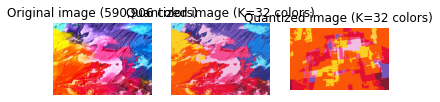

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

img1 = skimage.io.imread("example_data/texture/texture_30.jpg")
img2 = skimage.io.imread("example_data/texture/texture_5.jpg")

colors = 10
imgOriginal = img1
imgOriginal2 = img2

imgArray = np.reshape(imgOriginal, (-1, 3))
imgArray = imgArray / 255

imgArrayTrain = shuffle(imgArray, random_state=0)[:10000]
kmeans = KMeans(n_clusters=colors, random_state=0).fit(imgArrayTrain)

labels = kmeans.predict(imgArray)
centers = kmeans.cluster_centers_
img_a = np.reshape(centers[labels], imgOriginal.shape)

imgArray2 = np.reshape(imgOriginal2, (-1, 3))
imgArray2 = imgArray2 / 255
labels2 = kmeans.predict(imgArray2)
centers2 = kmeans.cluster_centers_
img_b = np.reshape(centers2[labels2], imgOriginal2.shape)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.axis('off')
ax1.set_title('Original image (590,906 colors)')
ax1.imshow(imgOriginal)
ax2.axis('off')
ax2.set_title('Quantized image (K=32 colors)')
ax2.imshow(img_a)
ax3.axis('off')
ax3.set_title('Quantized image (K=32 colors)')
ax3.imshow(img_b)
plt.show()

In [118]:
n = 1
exclude = [False] * (5-n)

exclude.extend(([True] * n))

In [119]:
exclude

[False, False, False, False, True]